# Vehicle CO2 Emission Analysis and Prediction Part-2

* This part is for numeric values, linear and polynomial regression models will be applied for single attributes
* And K-means clustering will be used to fit all the numeric attributes for CO2 Emissions.

In [171]:
# import libraries
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import r2_score

## 1. Predict CO2 Emissions with numeric attributes 
### 1.1 Linear Regression

In [5]:
url =r'C:\Users\Xiang Fu\Downloads\My-Projects-master\upload/FuelConsumptionCo2.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


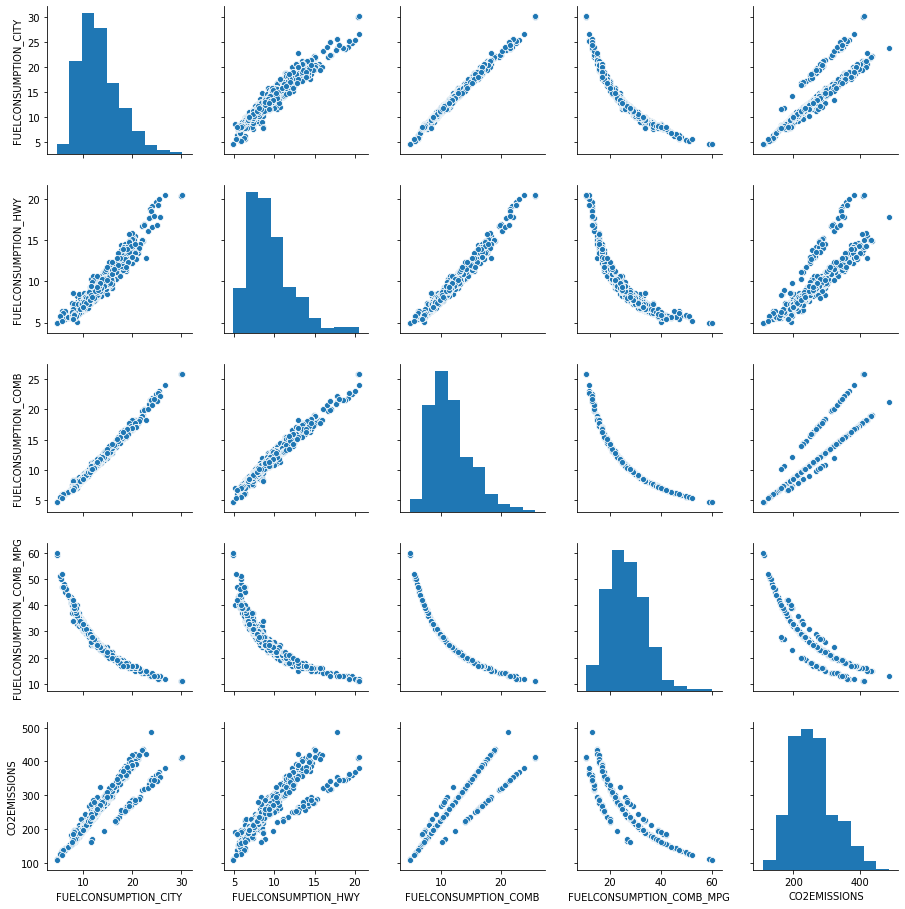

In [6]:
# For the FuelConsumption data (numeric), they are ready to fit into models.
x2 = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
# The seaborn plot could automatically calculate and show nice statistic figures with a bunch of data.
sns.pairplot(x2)

### First Impression
1. The top figure shows the CO2 emission by different features of the vehicles and oils; The feature 'EngineSize' seems to have linear relationship with 'CO2 Emission', while others may not be tightly related to CO2 emission;
2. Some of below figures of Fuel Consumption data reflects both logitic.

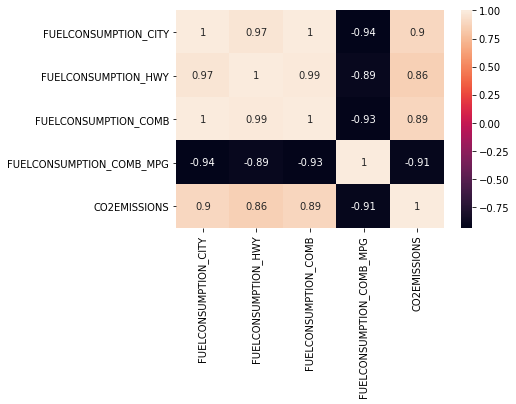

In [7]:
# Use correMatrix to find the relativity of these data
corrMatrix = x2.corr()
sns.heatmap(corrMatrix, annot=True )

#### Explanation of attributes
* City = City
* HWY = Highway
* Comb = Combination of city and hwy 
* MPG = Miles per gallon

### 1.2 Linear Regression model

In [11]:
# There are many figures fit to linear regression,
# Here I just pick one of them to do analysis as example:
X_s = df[['FUELCONSUMPTION_COMB']]
y_s = df[['CO2EMISSIONS']]

# The Equation of Linear Regression is as Y = KX + b
# use sklearn to calculate the K(coefficients), b(intercept)

# Separate the dataset into train sets and test sets
from sklearn.model_selection import train_test_split
X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s,y_s,random_state = 1)

In [12]:
# finding K and b 
Fuel_reg = linear_model.LinearRegression()
Fuel_reg.fit(X_s_train, y_s_train)
Fuel_y_hat = Fuel_reg.predict(X_s_test)
# Calculate the coefficients
print ('Coefficients: ', Fuel_reg.coef_)
print ('Intercept: ',Fuel_reg.intercept_)

Coefficients:  [[16.31628365]]
Intercept:  [67.22462507]


Text(0, 0.5, 'CO2 Emission')

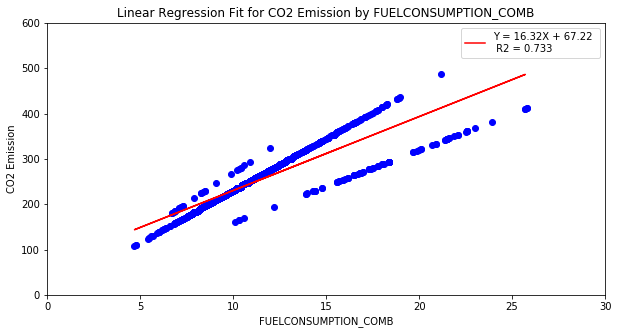

In [13]:
# plot the linear regression line
plt.figure(figsize=(10,5))
plt.scatter(X_s, y_s, color='b')
plt.title('Linear Regression Fit for CO2 Emission by FUELCONSUMPTION_COMB')
plt.xlim(0,30)
plt.ylim(0,600)
plt.plot(X_s_train, Fuel_reg.coef_[0]*X_s_train + Fuel_reg.intercept_[0], '-r',
        label = 'Y = {}X + {} \n R2 = {}'.format(Fuel_reg.coef_[0][0].round(2),
                                                  Fuel_reg.intercept_[0].round(2),
                                                  r2_score(Fuel_y_hat , y_s_test).round(3)))
plt.legend(loc = 'best')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emission")

* interpret this correlation as CO2 Emission = Fuel Consumption_COMB * 16.32 + 67.22
* with a R2 = 0.733

In [14]:
# Mean absolute error(MAE) tells us how big of an error we can expect from the forecast on average
print("Mean absolute error(MAE): %.2f" % np.mean(np.absolute(Fuel_y_hat - y_s_test)))

# Mean square error(MSE) corresponding to the expected value of the squared error loss
print("Mean square error(MSE): %.2f" % np.mean((Fuel_y_hat - y_s_test) ** 2))

# is the value which shows how good it fits the training data, the closer R to 1, the better.
print("R2-score: %.2f" % r2_score(Fuel_y_hat , y_s_test) )

Mean absolute error(MAE): 21.14
Mean square error(MSE): 876.93
R2-score: 0.73


#### Therefore the relationship between CO2 Emission and Fuel Consumption_COMB is: 
* CO2 Emission = Fuel Consumption_COMB * 16.32 + 67.22
* MAE: 21.14
* MSE: 876.93
* R2-score: 0.73
* note: this single-feature may not be the perfect fit (R2>0.99), however, that's more realitic because the gas emission always influenced by many factors. 
----
* Linear Regression models are fitting well with numeric values on CO2 emissions prediction. 

### 1.3 Polynomial Regression model

In [15]:
# The Polynomial Regression is by multiple different K to a upgrade X,
# Its equation is Y = K1X + K2X^2 + K3X^3 + ... + b
from sklearn.preprocessing import PolynomialFeatures
Fuel_poly = PolynomialFeatures(degree=2) # degree means the highest order of X that it may reach to

X_s = df[['FUELCONSUMPTION_COMB_MPG']]
y_s = df[['CO2EMISSIONS']]
X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s,y_s,random_state = 2)

In [16]:
# The method of polynomial regression is based on linear regression, but with polynomial feature fitting with the line
Fuel_reg = linear_model.LinearRegression()
Fuel_reg.fit(X_s_train, y_s_train)

train_x_poly = Fuel_poly.fit_transform(X_s_train)
train_y_poly = Fuel_reg.fit(train_x_poly, y_s_train)

# Calculate the coefficients
print ('Coefficients: ', Fuel_reg.coef_) # the first one goes to zero as standard
print ('Intercept: ',Fuel_reg.intercept_)

Coefficients:  [[  0.         -14.50659799   0.12100909]]
Intercept:  [547.86339846]


In [17]:
test_x_poly = Fuel_poly.fit_transform(X_s_test)
test_y_hat = Fuel_reg.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_s_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_s_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_s_test) )

Mean absolute error: 14.63
Residual sum of squares (MSE): 625.20
R2-score: 0.81


Text(0, 0.5, 'CO2 Emission')

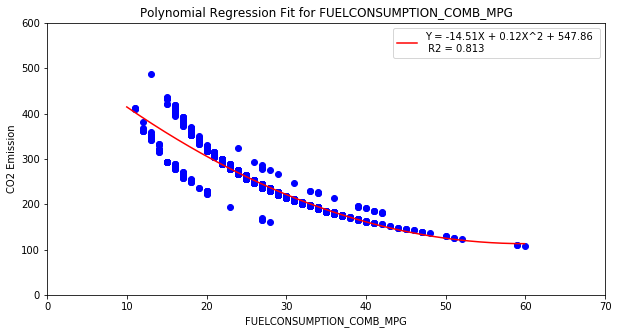

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(X_s, y_s, color='b')
plt.title('Polynomial Regression Fit for FUELCONSUMPTION_COMB_MPG')
plt.xlim(0,70)
plt.ylim(0,600)
x_range = np.arange(10.0, 60.0, 0.1) # set a range for the regression curve
Y = Fuel_reg.coef_[0][1]*x_range + Fuel_reg.coef_[0][2]*np.power(x_range, 2) + Fuel_reg.intercept_[0]
plt.plot(x_range, Y, '-r',
        label = 'Y = {}X + {}X^2 + {} \n R2 = {}'.format(Fuel_reg.coef_[0][1].round(2),
                                                  Fuel_reg.coef_[0][2].round(2),
                                                  Fuel_reg.intercept_[0].round(2),
                                                  r2_score(test_y_hat , y_s_test).round(3)))
plt.legend(loc = 'best')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emission")

##### The Polynomial Regression fits well with Fuel Consumption comb_MPG vs. CO2 Emissions. 
##### The equation in the figure can be used to predict the CO2 emissions with known MPG values: 
* Y = -15.22X + 0.13X^2 + 559.94
* Y = CO2 Emissions
* X = Fuel Consumption comb_MPG


## 2. Clustering
### 2.1 K-Means model

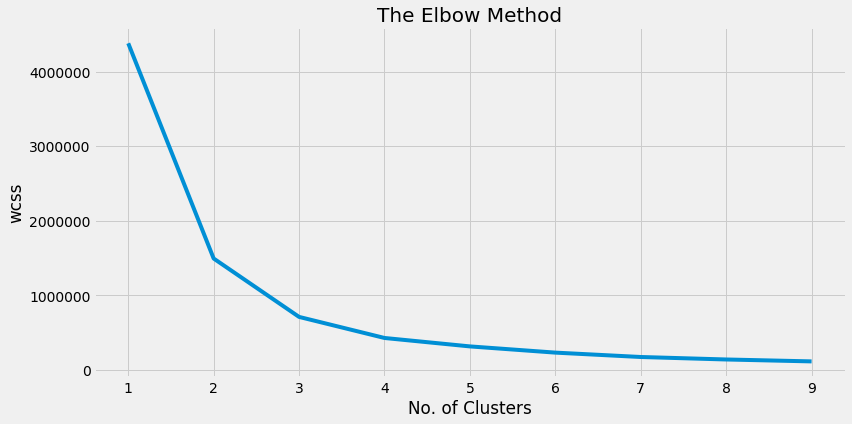

In [156]:
# K-Means model is computing centroids for groups of date that have close distance by their mean values
# Use Elbow Method to find the No. of Optimal Clusters
from sklearn.cluster import KMeans

X_c = x2.copy()

wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X_c)
    wcss.append(km.inertia_)

plt.figure(figsize = (12,6))    
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

### No.3 looks like good cluster numbers, for the slop apparently change after 3

In [160]:
# fitting the models with n = 3
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 5)
y_means = km.fit_predict(X_c)

In [161]:
X_cc = X_c.values
X_cc.shape

(1067, 5)

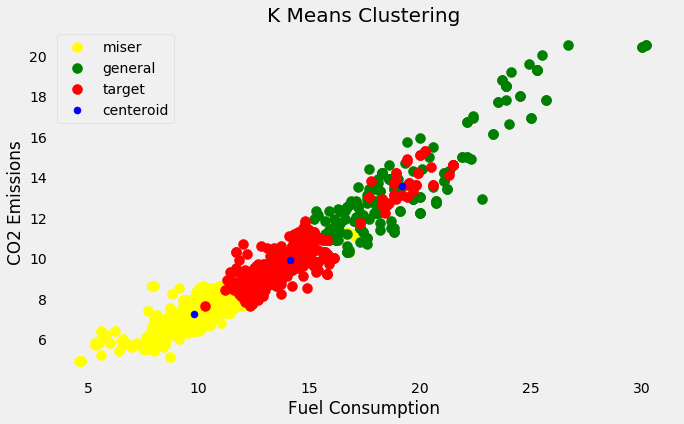

In [162]:
# polt the clusters
plt.figure(figsize=(10,6))
plt.scatter(X_cc[y_means == 0, 0], X_cc[y_means == 0, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(X_cc[y_means == 1, 0], X_cc[y_means == 1, 1], s = 100, c = 'green', label = 'general')
plt.scatter(X_cc[y_means == 2, 0], X_cc[y_means == 2, 1], s = 100, c = 'red', label = 'target')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

### 2.1 Hierarchical clustering
* Hierarchical clustering is an algorithm that groups similar objects into groups called clusters.

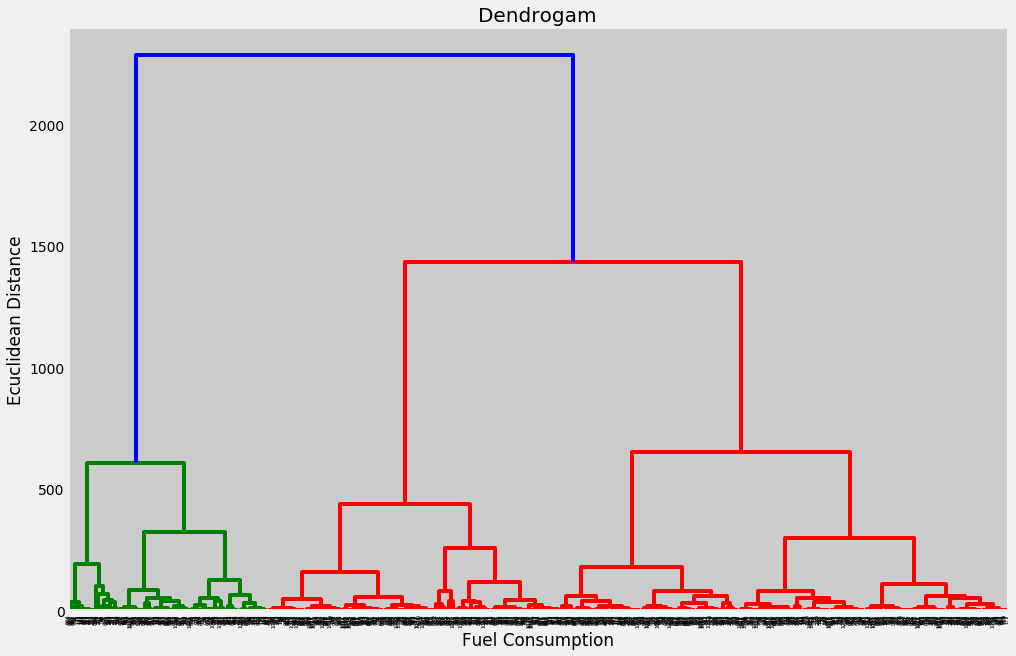

In [170]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_cc, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Fuel Consumption')
plt.ylabel('Ecuclidean Distance')
plt.show()

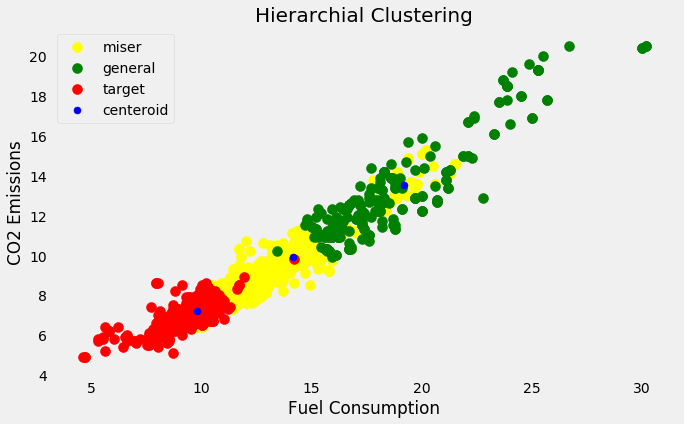

In [169]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_cc)

plt.figure(figsize=(10,6))
plt.scatter(X_cc[y_hc == 0, 0], X_cc[y_hc == 0, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(X_cc[y_hc == 1, 0], X_cc[y_hc == 1, 1], s = 100, c = 'green', label = 'general')
plt.scatter(X_cc[y_hc == 2, 0], X_cc[y_hc == 2, 1], s = 100, c = 'red', label = 'target')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()